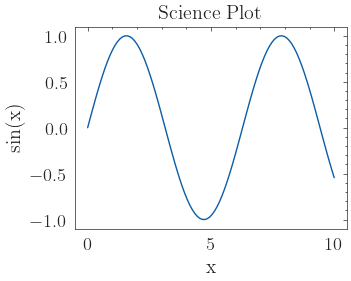

In [8]:
import matplotlib.pyplot as plt
import scienceplots  # 👈 这一句不能省

plt.style.use('science')

# 示例绘图
import numpy as np
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title("Science Plot")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.show()


In [9]:
# 第一步：导入核心实验数据
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-paper')
print("正在导入核心实验数据...")

file_path = 'results/taboo_experiment_20250712_004918/complete_experiment_results.csv'

try:
    complete_experiment_results = pd.read_csv(file_path, encoding='utf-8')
    print(f"✅ 成功加载实验数据：{file_path}")
except FileNotFoundError:
    print(f"❌ 未找到文件：{file_path}")
    complete_experiment_results = None

# 显示数据基本信息
if complete_experiment_results is not None:
    print(f"\n📊 数据基本信息：")
    print(f"   总记录数：{len(complete_experiment_results):,} 条")
    print(f"   列数：{len(complete_experiment_results.columns)} 列")
    
    print(f"\n📋 数据列名：")
    for i, col in enumerate(complete_experiment_results.columns, 1):
        print(f"   {i:2d}. {col}")
    
    print(f"\n🔍 数据预览（前 5 行）：")
    display(complete_experiment_results.head())

正在导入核心实验数据...
✅ 成功加载实验数据：results/taboo_experiment_20250712_004918/complete_experiment_results.csv

📊 数据基本信息：
   总记录数：4,800 条
   列数：23 列

📋 数据列名：
    1. game_id
    2. word_index
    3. hinter_model
    4. guesser_model
    5. target_word
    6. category
    7. taboo_words
    8. success
    9. turns_used
   10. final_guess
   11. failure_reason
   12. taboo_violation_turn
   13. taboo_violation_hint
   14. has_taboo_violation
   15. all_hints
   16. all_guesses
   17. conversation
   18. total_api_attempts
   19. format_errors
   20. has_format_errors
   21. duration_seconds
   22. timestamp
   23. error

🔍 数据预览（前 5 行）：


,game_id,word_index,hinter_model,guesser_model,target_word,category,taboo_words,success,turns_used,final_guess,...,has_taboo_violation,all_hints,all_guesses,conversation,total_api_attempts,format_errors,has_format_errors,duration_seconds,timestamp,error
0,gpt-4o_1,0,openai/gpt-4o,openai/gpt-4o,crotonbug,general,common|croton|europe|german|states,False,5,beetle,...,False,Hinter: [CLUE] This is an insect often found i...,Guesser: [GUESS] cockroach | Guesser: [GUESS] ...,Hinter: [CLUE] This is an insect often found i...,10,NaN,False,9.66,2025-07-12 00:49:27,NaN
1,gpt-4o_2,1,openai/gpt-4o,openai/gpt-4o,entitlement,general,budget|claim|federal|granted|major,True,1,entitlement,...,False,Hinter: [CLUE] This is a term often used to de...,Guesser: [GUESS] entitlement,Hinter: [CLUE] This is a term often used to de...,2,NaN,False,1.82,2025-07-12 00:49:29,NaN
2,gpt-4o_3,2,openai/gpt-4o,openai/gpt-4o,hinge,general,holds|joint|parts|strap|swing,True,1,hinge,...,False,Hinter: [CLUE] This is a device that allows do...,Guesser: [GUESS] hinge,Hinter: [CLUE] This is a device that allows do...,2,NaN,False,1.53,2025-07-12 00:49:31,NaN
3,gpt-4o_4,3,openai/gpt-4o,openai/gpt-4o,cubiform,general,cuboid|shaped|cubical|cube|cubelike,False,5,cubical,...,False,Hinter: [CLUE] This is a geometric form with s...,Guesser: [GUESS] cube | Guesser: [GUESS] cuboi...,Hinter: [CLUE] This is a geometric form with s...,10,NaN,False,12.06,2025-07-12 00:49:44,NaN
4,gpt-4o_5,4,openai/gpt-4o,openai/gpt-4o,mantle,general,mickey|symbol|cloak|place|younger,True,1,mantle,...,False,Hinter: [CLUE] This is a part of the Earth loc...,Guesser: [GUESS] mantle,Hinter: [CLUE] This is a part of the Earth loc...,2,NaN,False,1.83,2025-07-12 00:49:46,NaN


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置全局 science 风格已在前面 done
sns.set_theme(style="white", font_scale=1.2)

# —— 重新排序列：倒序 ——  
pivot_sorted = pivot[pivot.columns[::-1]]      # 仅改变显示顺序

plt.figure(figsize=(12, 9))
sns.heatmap(
    pivot_sorted,
    annot=True, fmt=".3f",
    cmap=sns.color_palette("magma", as_cmap=True),  # ← magma 色板
    vmin=0, vmax=1,
    linewidths=.6, linecolor="white",
    annot_kws={"size": 11, "weight": "bold"}
)

# plt.title("Figure 1. Core-300 Guesser-Hinter Success Rate", fontsize=22, weight="bold", pad=16)
plt.xlabel("Hinter Model", fontsize=20)
plt.ylabel("Guesser Model", fontsize=20)
plt.xticks(rotation=45, ha="right", fontsize=16)
plt.yticks(rotation=0, fontsize=16)
plt.tight_layout()
# 创建保存目录（若不存在）
import os, pathlib
out_dir = pathlib.Path("figures")
out_dir.mkdir(exist_ok=True)

# 以标题作为文件名保存为 PDF 和 PNG
fname = "Core-300_Guesser-Hinter_SuccessRate"
plt.savefig(out_dir / f"{fname}.pdf",  bbox_inches="tight")
plt.savefig(out_dir / f"{fname}.png",  dpi=300, bbox_inches="tight")
plt.show()

NameError: name 'pivot' is not defined

In [23]:
# ---------- Automatic analysis of the heat-map ----------
import numpy as np

# pivot_sorted is the matrix we plotted
analysis = {}

# overall mean success rate
analysis['overall_mean'] = pivot_sorted.values.mean()

# best / worst hinter
hinter_means = pivot_sorted.mean(axis=0).sort_values(ascending=False)
analysis['best_hinter']  = (hinter_means.index[0],  hinter_means.iloc[0])
analysis['worst_hinter'] = (hinter_means.index[-1], hinter_means.iloc[-1])

# best / worst guesser
guesser_means = pivot_sorted.mean(axis=1).sort_values(ascending=False)
analysis['best_guesser']  = (guesser_means.index[0],  guesser_means.iloc[0])
analysis['worst_guesser'] = (guesser_means.index[-1], guesser_means.iloc[-1])

# strongest synergy (max cell) & weakest synergy (min cell)
max_idx = np.unravel_index(np.argmax(pivot_sorted.values), pivot_sorted.shape)
min_idx = np.unravel_index(np.argmin(pivot_sorted.values), pivot_sorted.shape)
analysis['best_pair'] = (pivot_sorted.index[max_idx[0]],
                         pivot_sorted.columns[max_idx[1]],
                         pivot_sorted.iloc[max_idx])
analysis['worst_pair'] = (pivot_sorted.index[min_idx[0]],
                          pivot_sorted.columns[min_idx[1]],
                          pivot_sorted.iloc[min_idx])

# --- Print narrative summary ---
print(f"Overall mean success rate is {analysis['overall_mean']:.3f}.")

print(f"Best Hinter:  {analysis['best_hinter'][0]} "
      f"({analysis['best_hinter'][1]:.3f} mean across guessers).")
print(f"Worst Hinter: {analysis['worst_hinter'][0]} "
      f"({analysis['worst_hinter'][1]:.3f}).\n")

print(f"Best Guesser:  {analysis['best_guesser'][0]} "
      f"({analysis['best_guesser'][1]:.3f} mean across hinters).")
print(f"Worst Guesser: {analysis['worst_guesser'][0]} "
      f"({analysis['worst_guesser'][1]:.3f}).\n")

print(f"Strongest synergy: Guesser {analysis['best_pair'][0]} + "
      f"Hinter {analysis['best_pair'][1]} "
      f"→ {analysis['best_pair'][2]:.3f} success.")
print(f"Weakest synergy:  Guesser {analysis['worst_pair'][0]} + "
      f"Hinter {analysis['worst_pair'][1]} "
      f"→ {analysis['worst_pair'][2]:.3f} success.")

Overall mean success rate is 0.906.
Best Hinter:  google/gemini-2.5-pro (0.967 mean across guessers).
Worst Hinter: openai/gpt-4o (0.805).

Best Guesser:  anthropic/claude-sonnet-4 (0.920 mean across hinters).
Worst Guesser: deepseek/deepseek-chat-v3-0324 (0.893).

Strongest synergy: Guesser openai/gpt-4o + Hinter anthropic/claude-sonnet-4 → 0.977 success.
Weakest synergy:  Guesser deepseek/deepseek-chat-v3-0324 + Hinter openai/gpt-4o → 0.780 success.


In [29]:
import pandas as pd
from IPython.display import display, Markdown

# === 1. Hinter / Guesser 平均成功率表 ===
hinter_means  = pivot_sorted.mean(axis=0).sort_values(ascending=False).rename("Hinter 平均成功率")
guesser_means = pivot_sorted.mean(axis=1).sort_values(ascending=False).rename("Guesser 平均成功率")

tbl1 = pd.DataFrame({
    "Hinter":  hinter_means.index,
    "平均成功率": (hinter_means.values*100).round(1)  # 百分比形式
})
tbl2 = pd.DataFrame({
    "Guesser": guesser_means.index,
    "平均成功率": (guesser_means.values*100).round(1)
})

# 显示为 Markdown
display(Markdown("**Hinter 平均成功率（降序）**"))
display(tbl1)

display(Markdown("**Guesser 平均成功率（降序）**"))
display(tbl2)

# LaTeX 导出
latex_hinter  = tbl1.to_latex(index=False, caption="各 Hinter 平均成功率（%）", label="tab:hinter_acc")
latex_guesser = tbl2.to_latex(index=False, caption="各 Guesser 平均成功率（%）", label="tab:guesser_acc")

with open("figures/table_hinter_guesser.tex", "w") as f:
    f.write(latex_hinter + "\n\n" + latex_guesser)

print("→ 已保存 LaTeX 表格到 figures/table_hinter_guesser.tex")

# === 2. 最优 / 最差组合表 ===
# 已在 analysis 字典中得到 best_pair 与 worst_pair
pair_df = pd.DataFrame([
    {"组合": "最佳", "Guesser": analysis['best_pair'][0],
     "Hinter": analysis['best_pair'][1],
     "成功率(%)": round(analysis['best_pair'][2]*100, 1)},
    {"组合": "最差", "Guesser": analysis['worst_pair'][0],
     "Hinter": analysis['worst_pair'][1],
     "成功率(%)": round(analysis['worst_pair'][2]*100, 1)}
])

display(Markdown("**最佳 / 最差 Guesser–Hinter 组合**"))
display(pair_df)

latex_pair = pair_df.to_latex(index=False,
                              caption="最佳与最差 Guesser–Hinter 组合成功率（%）",
                              label="tab:pair_acc")
with open("figures/table_pair.tex", "w") as f:
    f.write(latex_pair)

print("→ 已保存 LaTeX 表格到 figures/table_pair.tex")
import pandas as pd
from IPython.display import display, Markdown
import pathlib, os

# === 生成热力图对应的数值表 ===
heat_tbl = (pivot_sorted * 100).round(1)  # 转为百分比并保留 1 位小数

display(Markdown("**Guesser × Hinter 成功率矩阵（%）**"))
display(heat_tbl)

# === 导出 LaTeX 与 CSV ===
out_dir = pathlib.Path("figures")
out_dir.mkdir(exist_ok=True)

latex_heat = heat_tbl.to_latex(
    caption="各 Guesser–Hinter 组合的成功率（\\%）",
    label="tab:heatmap_full",
    bold_rows=True
)
( out_dir / "table_heatmap.tex").write_text(latex_heat, encoding="utf-8")
heat_tbl.to_csv(out_dir / "table_heatmap.csv")

print("→ 已保存表格到 figures/table_heatmap.tex 及 table_heatmap.csv")

**Hinter 平均成功率（降序）**

,Hinter,平均成功率
0,google/gemini-2.5-pro,96.7
1,anthropic/claude-sonnet-4,95.9
2,deepseek/deepseek-chat-v3-0324,89.4
3,openai/gpt-4o,80.5


**Guesser 平均成功率（降序）**

,Guesser,平均成功率
0,anthropic/claude-sonnet-4,92.0
1,google/gemini-2.5-pro,91.1
2,openai/gpt-4o,90.0
3,deepseek/deepseek-chat-v3-0324,89.4


→ 已保存 LaTeX 表格到 figures/table_hinter_guesser.tex


**最佳 / 最差 Guesser–Hinter 组合**

,组合,Guesser,Hinter,成功率(%)
0,最佳,openai/gpt-4o,anthropic/claude-sonnet-4,97.7
1,最差,deepseek/deepseek-chat-v3-0324,openai/gpt-4o,78.0


→ 已保存 LaTeX 表格到 figures/table_pair.tex


**Guesser × Hinter 成功率矩阵（%）**

hinter_model,openai/gpt-4o,google/gemini-2.5-pro,deepseek/deepseek-chat-v3-0324,anthropic/claude-sonnet-4
guesser_model,,,,
anthropic/claude-sonnet-4,82.7,97.3,92.0,96.0
deepseek/deepseek-chat-v3-0324,78.0,96.7,87.0,95.7
google/gemini-2.5-pro,83.3,96.0,91.0,94.3
openai/gpt-4o,78.0,96.7,87.7,97.7


→ 已保存表格到 figures/table_heatmap.tex 及 table_heatmap.csv


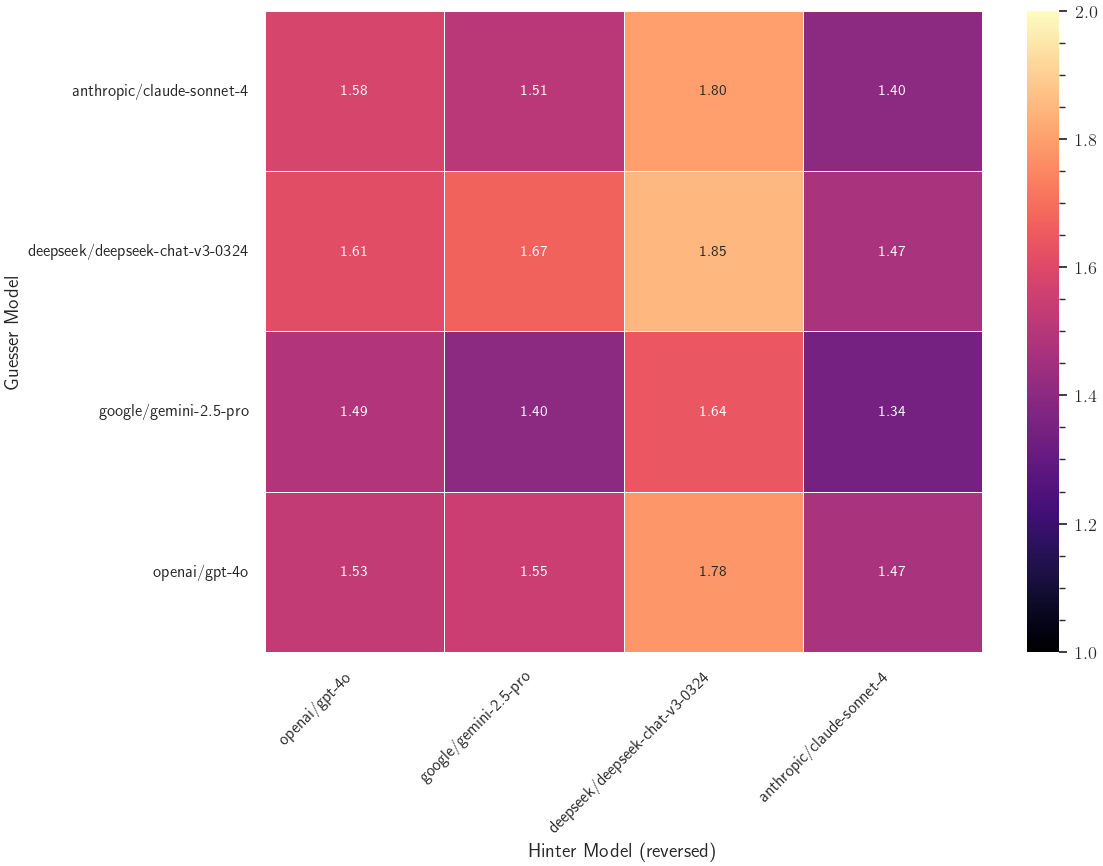

**Guesser × Hinter 平均成功轮数**

hinter_model,openai/gpt-4o,google/gemini-2.5-pro,deepseek/deepseek-chat-v3-0324,anthropic/claude-sonnet-4
guesser_model,,,,
anthropic/claude-sonnet-4,1.58,1.51,1.80,1.40
deepseek/deepseek-chat-v3-0324,1.61,1.67,1.85,1.47
google/gemini-2.5-pro,1.49,1.40,1.64,1.34
openai/gpt-4o,1.53,1.55,1.78,1.47


→ 已保存 average-turns 热力图及表格至 figures/ 目录


In [32]:
# ---------- 平均成功轮数 (Average Turns to Success) ----------
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
import numpy as np, pathlib, os

# 仅保留成功局
df_success = complete_experiment_results[complete_experiment_results["success"]]

# 计算每个 Guesser–Hinter 组合的平均轮数
turns_mean = (
    df_success
    .groupby(["guesser_model", "hinter_model"])["turns_used"]
    .mean()
    .unstack()          # 生成行=Guesser, 列=Hinter
)

# 使列按之前热力图的倒序排列（与成功率图保持一致）
turns_pivot = turns_mean[turns_mean.columns[::-1]].round(2)

# === 1. 热力图 ===
plt.figure(figsize=(12,9))
sns.heatmap(
    turns_pivot,
    annot=True, fmt=".2f",
    cmap=sns.color_palette("magma", as_cmap=True),  # 深色=轮数少，浅色=多
    vmin=1, vmax=np.ceil(turns_pivot.max().max()),
    linewidths=.6, linecolor="white",
    annot_kws={"size":11, "weight":"bold"}
)
plt.xlabel("Hinter Model (reversed)", fontsize=14)
plt.ylabel("Guesser Model", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()

# 保存图片
out_dir = pathlib.Path("figures"); out_dir.mkdir(exist_ok=True)
fname = "Core-300_Average_Turns_to_Success"
plt.savefig(out_dir / f"{fname}.pdf", bbox_inches="tight")
plt.savefig(out_dir / f"{fname}.png", dpi=300, bbox_inches="tight")
plt.show()

# === 2. 导出表格 ===
# a) Markdown / Notebook 展示
from IPython.display import display, Markdown
display(Markdown("**Guesser × Hinter 平均成功轮数**"))
display(turns_pivot)

# b) LaTeX 与 CSV 文件
(turns_pivot).to_csv(out_dir / "table_avg_turns.csv")
latex_turns = turns_pivot.to_latex(
    caption="各 Guesser–Hinter 组合的平均成功轮数",
    label="tab:avg_turns",
    bold_rows=True
)
(out_dir / "table_avg_turns.tex").write_text(latex_turns, encoding="utf-8")
print("→ 已保存 average-turns 热力图及表格至 figures/ 目录")